In [1]:
import pandas as pd
import numpy as np
path = r'C:\Users\ranji\OneDrive\Desktop\Data Science\March Data\March Madness 24.xlsx'
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['2017', '2018', '2019', '2021', '2022', '2023', '2024']


In [2]:
df2017 = pd.read_excel(xl, sheet_name=0)
df2017['Year'] = 2017

df2018 = pd.read_excel(xl, sheet_name=1)
df2018['Year'] = 2018

df2019 = pd.read_excel(xl, sheet_name=2)
df2019['Year'] = 2019

df2021 = pd.read_excel(xl, sheet_name=3)
df2021['Year'] = 2021

df2022 = pd.read_excel(xl, sheet_name=4)
df2022['Year'] = 2022

df2023 = pd.read_excel(xl, sheet_name=5)
df2023['Year'] = 2023

ystart = pd.read_excel(xl, sheet_name=6)
ystart['Year'] = 2024
y1 = ystart.loc[ystart.Round == 64]
y1 = y1.replace(["Texas A&M", "Saint Mary's "], ["Texas AM", "Saint Mary's"])

dfold = pd.concat([df2017, df2018, df2019, df2021, df2022, df2023])

In [3]:
path2 = r'C:\Users\ranji\OneDrive\Desktop\Data Science\March Data'
tj17 = pd.read_csv(path2 + '\data17.csv')
tj18 = pd.read_csv(path2 + '\data18.csv')
tj19 = pd.read_csv(path2 + '\data19.csv')
tj21 = pd.read_csv(path2 + '\data21.csv')
tj22 = pd.read_csv(path2 + '\data22.csv')
tj23 = pd.read_csv(path2 + '\data23.csv')
y24 = pd.read_csv(path2 + '\data24.csv')

tjAll = pd.concat([tj17, tj18, tj19, tj21, tj22, tj23])

In [4]:
replaceThis = ["Connecticut", "Mississippi State", "Miami (Fla.)", "Iowa State", "Florida State", 
               "North Carolina", "Texas A&M", "Ohio State", "Michigan State", "Utah State", "San Diego State", 
               "Oklahoma State", "Boise State", "Indiana", "Florida Atlantic", "Colorado State", "Kansas State",
               "Washington State", "McNeese State"]
withThis = ["UConn", "Mississippi St.", "Miami", "Iowa St.", "Florida St.", "UNC", "Texas AM", "Ohio St.", "Michigan St.",
           "Utah St.", "San Diego St.", "Oklahoma St.", "Boise St.", "IU", "FAU", "Colorado St.", "Kansas St.", 
            "Washington St.", "McNeese"]
tjAll = tjAll.replace(replaceThis, withThis)
y24 = y24.replace(replaceThis, withThis)

In [5]:
merged_A = pd.merge(dfold, tjAll, left_on=['Team_A', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_A'))
final_merged = pd.merge(merged_A, tjAll, left_on=['Team_B', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_B'))
final_merged = final_merged.drop(columns = ['team', 'team_B', 'tooltip_team', 'tooltip_team_B'])

In [6]:
merged_Y = pd.merge(y1, y24, left_on=['Team_A', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_A'))
merged_Y = pd.merge(merged_Y, y24, left_on=['Team_B', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_B'))
merged_Y = merged_Y.drop(columns = ['team', 'team_B', 'tooltip_team', 'tooltip_team_B'])

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [8]:
#Changed from score to binary classifier
final_merged['won'] = np.where(final_merged['Score'] > 0, 1, 0)

In [9]:
class BasketballNet(nn.Module):
    def __init__(self, num_features = 26):
        super().__init__()
        self.layer1 = nn.Linear(num_features, 20)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(20, 12)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(12, 2)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.output_layer(x)
        return x

In [10]:
final_merged = final_merged.drop(columns = ['Team_A', 'Team_B', 'Score', 'Round', 'Year',
                                 "runs_per_game", "runs_conceded_per_game", "runs_total", "runs_conceded_total",
                                 "runs_per_game_B", "runs_conceded_per_game_B", "runs_total_B", "runs_conceded_total_B"])
final_merged = final_merged.dropna()

In [11]:
X = final_merged.drop(columns = ['won']).values
y = final_merged['won'].dropna().values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
model = BasketballNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

tensor(2.5905, grad_fn=<NllLossBackward0>)
tensor(0.6668, grad_fn=<NllLossBackward0>)
tensor(0.5581, grad_fn=<NllLossBackward0>)
tensor(0.5014, grad_fn=<NllLossBackward0>)
tensor(0.4565, grad_fn=<NllLossBackward0>)
tensor(0.4166, grad_fn=<NllLossBackward0>)
tensor(0.3820, grad_fn=<NllLossBackward0>)
tensor(0.3461, grad_fn=<NllLossBackward0>)
tensor(0.3092, grad_fn=<NllLossBackward0>)
tensor(0.2708, grad_fn=<NllLossBackward0>)


Text(0, 0.5, 'Loss')

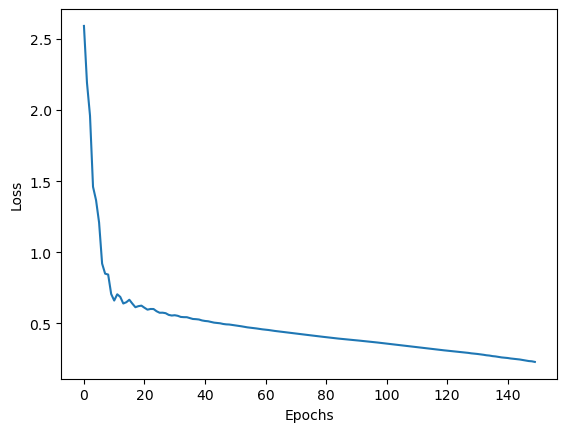

In [16]:
epoch = 150
losses = []

for i in range(epoch):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i%15 == 0:
        print(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
import matplotlib.pyplot as plt
plt.plot(range(epoch), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [17]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.7446)

In [18]:
correct = 0
for i, data in enumerate(X_test):
    y_val = model.forward(data)
    
    if (y_val.argmax().item() == y_test[i]):
        correct += 1

print(f'{correct} of {X_test.shape[0]}')

33 of 45


In [19]:
#HERE we begin the feature engineering and PCAing of our data, because this was suboptimal before

In [20]:
new_final_merged = pd.DataFrame()
for i in range(13):
    col_name = final_merged.columns[i]
    
    new_final_merged[col_name + "_diff"] = final_merged[col_name] / final_merged[col_name + "_B"]
new_final_merged['won'] = final_merged['won']

In [21]:
new_final_merged.shape

(224, 14)

In [22]:
X2 = new_final_merged.drop(columns = ['won']).values
y2 = new_final_merged['won'].values

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [24]:
X2_train = torch.FloatTensor(X2_train)
X2_test = torch.FloatTensor(X2_test)
y2_train = torch.LongTensor(y2_train)
y2_test = torch.LongTensor(y2_test)

In [25]:
model2 = BasketballNet(13)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr = 0.005)

tensor(0.3054, grad_fn=<NllLossBackward0>)


Text(0, 0.5, 'Loss')

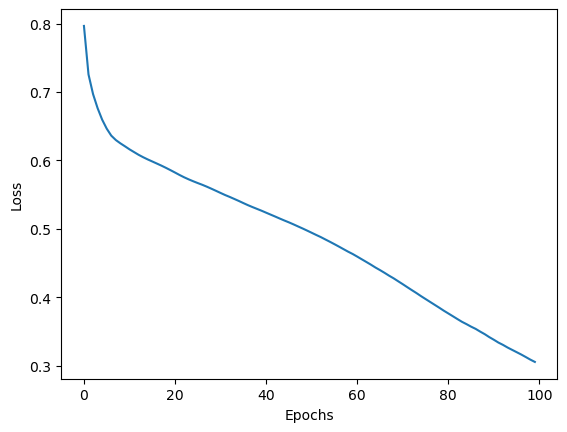

In [26]:
epoch = 100
losses = []

for i in range(epoch):
    y2_pred = model2.forward(X2_train)
    loss = criterion(y2_pred, y2_train)
    losses.append(loss.detach().numpy())
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(loss)

plt.plot(range(epoch), losses)

plt.xlabel("Epochs")
plt.ylabel("Loss")

In [27]:
with torch.no_grad():
    y2_eval = model2.forward(X2_test)
    loss = criterion(y2_eval, y2_test)
loss

tensor(1.9415)

In [28]:
correct = 0
for i, data in enumerate(X2_test):
    y2_val = model2.forward(data)
    
    if (y2_val.argmax().item() == y2_test[i]):
        correct += 1

print(f'{correct} of {X2_test.shape[0]}')

31 of 45


In [29]:
#PCAAAAAAAA please

Training loss
tensor(0.2315, grad_fn=<NllLossBackward0>)
Testing loss
1.3953542709350586
31 of 45
Training loss
tensor(0.2593, grad_fn=<NllLossBackward0>)
Testing loss
1.3046233654022217
29 of 45
Training loss
tensor(0.2940, grad_fn=<NllLossBackward0>)
Testing loss
0.7793444991111755
30 of 45
Training loss
tensor(0.2638, grad_fn=<NllLossBackward0>)
Testing loss
0.7704895734786987
33 of 45
Training loss
tensor(0.3642, grad_fn=<NllLossBackward0>)
Testing loss
1.8887540102005005
25 of 44


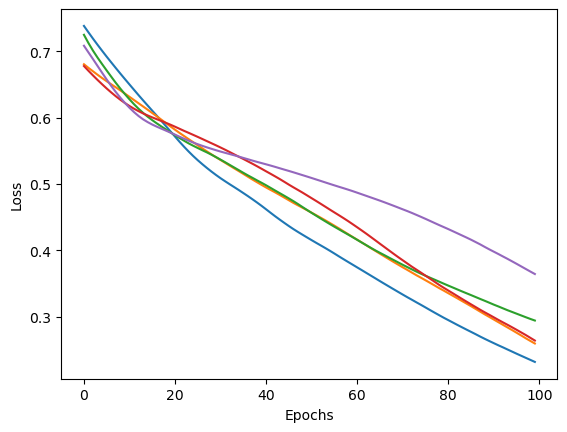

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold


k = 5
kf = KFold(n_splits=k, shuffle=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

#Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y2, test_size = 0.15)

#Xpca_train = torch.FloatTensor(Xpca_train)
#Xpca_test = torch.FloatTensor(Xpca_test)
#ypca_train = torch.LongTensor(ypca_train)
#ypca_test = torch.LongTensor(ypca_test)

#We are now FOLDING!!!

X_pca_tensor = torch.FloatTensor(X_pca)
y_tensor = torch.LongTensor(y2)

fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_pca_tensor)):
    # Split data into training and validation for the current fold
    X_train_fold = X_pca_tensor[train_idx]
    y_train_fold = y_tensor[train_idx]
    X_val_fold = X_pca_tensor[val_idx]
    y_val_fold = y_tensor[val_idx]
    
    
    modelPCA = BasketballNet(X_train_fold.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(modelPCA.parameters(), lr = 0.005)

    #Train the Model!

    epoch = 100
    losses = []

    for i in range(epoch):
        modelPCA.train()
        optimizer.zero_grad()
        output = modelPCA(X_train_fold)
        loss = criterion(output, y_train_fold)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().numpy())

    print("Training loss")
    print(loss)

    #Plot the (unfortunately high) losses

    plt.plot(range(epoch), losses)

    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    #Test loss
    modelPCA.eval()
    with torch.no_grad():
        ypca_eval = modelPCA.forward(X_val_fold)
        loss = criterion(ypca_eval, y_val_fold).item()
    print("Testing loss")
    print(loss)
    
    val_preds = torch.argmax(ypca_eval, dim=1)
    val_accuracy = (val_preds == y_val_fold).float().mean()

    #See how many we actually got wrong
    correct = 0
    for i, data in enumerate(X_val_fold):
        ypca_val = modelPCA.forward(data)

        if (ypca_val.argmax().item() == y_val_fold[i]):
            correct += 1

    print(f'{correct} of {X_val_fold.shape[0]}')
    
    fold_results.append((val_preds, val_accuracy))

In [31]:
#PREDICTION TIME, Let's dance March

In [32]:
merged_Y = merged_Y[['rank', 'obpr', 'dbpr', 'bpr', 'opponent_adjust', 'pace_adjust',
       'off_rank', 'def_rank', 'tempo', 'tempo_rank', 'home_rank', 'wins',
       'losses', 'rank_B', 'obpr_B', 'dbpr_B', 'bpr_B', 'opponent_adjust_B',
       'pace_adjust_B', 'off_rank_B', 'def_rank_B', 'tempo_B', 'tempo_rank_B',
       'home_rank_B', 'wins_B', 'losses_B']]
merged_Y = merged_Y.dropna()

In [33]:
new_merged_Y = pd.DataFrame()
for i in range(13):
    col_name = merged_Y.columns[i]
    
    new_merged_Y[col_name + "_diff"] = merged_Y[col_name] / merged_Y[col_name + "_B"]
    
#PCA this jawn
merged_Y_scaled = scaler.transform(new_merged_Y)

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [34]:
merged_Y_pca = pca.transform(merged_Y_scaled)
merged_Y_pca_tensor = torch.FloatTensor(merged_Y_pca)

modelPCA.eval()  #Ensure the model is in evaluation mode
with torch.no_grad():
    predictions = modelPCA(merged_Y_pca_tensor)
    
    predicted_winner = torch.argmax(predictions, dim=1)

In [35]:
y1['Prediction'] = np.where(predicted_winner == 1, y1.Team_A, y1.Team_B)
#Who does jawn think is winning round of 64!

In [36]:
y1

,Team_A,Team_B,Round,Year,Prediction
0,FAU,Northwestern,64,2024,FAU
1,San Diego St.,UAB,64,2024,San Diego St.
2,Washington St.,Drake,64,2024,Drake
3,Mississippi St.,Michigan St.,64,2024,Michigan St.
4,Saint Mary's,Grand Canyon,64,2024,Saint Mary's
5,Clemson,New Mexico,64,2024,Clemson
6,Dayton,Nevada,64,2024,Nevada
7,Nebraska,Texas AM,64,2024,Nebraska
8,Wisconsin,James Madison,64,2024,Wisconsin
9,Texas Tech,NC State,64,2024,Texas Tech


In [37]:
#Onto round 2
y2 = ystart.loc[ystart.Round == 32]
y2 = y2.replace("Uconn", "UConn")

In [38]:
merged_Y2 = pd.merge(y2, y24, left_on=['Team_A', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_A'))
merged_Y2 = pd.merge(merged_Y2, y24, left_on=['Team_B', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_B'))
merged_Y2 = merged_Y2.drop(columns = ['team', 'team_B', 'tooltip_team', 'tooltip_team_B'])

merged_Y2 = merged_Y2[['rank', 'obpr', 'dbpr', 'bpr', 'opponent_adjust', 'pace_adjust',
       'off_rank', 'def_rank', 'tempo', 'tempo_rank', 'home_rank', 'wins',
       'losses', 'rank_B', 'obpr_B', 'dbpr_B', 'bpr_B', 'opponent_adjust_B',
       'pace_adjust_B', 'off_rank_B', 'def_rank_B', 'tempo_B', 'tempo_rank_B',
       'home_rank_B', 'wins_B', 'losses_B']]
merged_Y2 = merged_Y2.dropna()

#Scale them to each other
new_merged_Y2 = pd.DataFrame()
for i in range(13):
    col_name = merged_Y2.columns[i]
    
    new_merged_Y2[col_name + "_diff"] = merged_Y2[col_name] / merged_Y2[col_name + "_B"]
    
#PCA this jawn
merged_Y2_scaled = scaler.transform(new_merged_Y2)

merged_Y2_pca = pca.transform(merged_Y2_scaled)
merged_Y2_pca_tensor = torch.FloatTensor(merged_Y2_pca)

modelPCA.eval()  #Ensure the model is in evaluation mode
with torch.no_grad():
    predictions = modelPCA(merged_Y2_pca_tensor)
    
    predicted_winner = torch.argmax(predictions, dim=1)

    
y2['Prediction'] = np.where(predicted_winner == 1, y2.Team_A, y2.Team_B)
#Who does jawn think is winning round of 64!

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [39]:
y2

,Team_A,Team_B,Round,Year,Prediction
15,UConn,FAU,32,2024,UConn
16,San Diego St.,Auburn,32,2024,San Diego St.
17,BYU,Illinois,32,2024,BYU
18,Drake,Iowa St.,32,2024,Drake
19,UNC,Michigan St.,32,2024,UNC
20,Saint Mary's,Alabama,32,2024,Saint Mary's
21,Clemson,Baylor,32,2024,Clemson
22,Dayton,Arizona,32,2024,Dayton
23,Houston,Nebraska,32,2024,Houston
24,Wisconsin,Duke,32,2024,Wisconsin


In [40]:
#Sweet Sixteen Baby!
y3 = ystart.loc[ystart.Round == 16]

In [41]:
merged_Y3 = pd.merge(y3, y24, left_on=['Team_A', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_A'))
merged_Y3 = pd.merge(merged_Y3, y24, left_on=['Team_B', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_B'))
merged_Y3 = merged_Y3.drop(columns = ['team', 'team_B', 'tooltip_team', 'tooltip_team_B'])

merged_Y3 = merged_Y3[['rank', 'obpr', 'dbpr', 'bpr', 'opponent_adjust', 'pace_adjust',
       'off_rank', 'def_rank', 'tempo', 'tempo_rank', 'home_rank', 'wins',
       'losses', 'rank_B', 'obpr_B', 'dbpr_B', 'bpr_B', 'opponent_adjust_B',
       'pace_adjust_B', 'off_rank_B', 'def_rank_B', 'tempo_B', 'tempo_rank_B',
       'home_rank_B', 'wins_B', 'losses_B']]
merged_Y3 = merged_Y3.dropna()

#Scale them to each other
new_merged_Y3 = pd.DataFrame()
for i in range(13):
    col_name = merged_Y3.columns[i]
    
    new_merged_Y3[col_name + "_diff"] = merged_Y3[col_name] / merged_Y3[col_name + "_B"]
    
#PCA this jawn
merged_Y3_scaled = scaler.transform(new_merged_Y3)

merged_Y3_pca = pca.transform(merged_Y3_scaled)
merged_Y3_pca_tensor = torch.FloatTensor(merged_Y3_pca)

modelPCA.eval()  #Ensure the model is in evaluation mode
with torch.no_grad():
    predictions = modelPCA(merged_Y3_pca_tensor)
    
    predicted_winner = torch.argmax(predictions, dim=1)

    
y3['Prediction'] = np.where(predicted_winner == 1, y3.Team_A, y3.Team_B)
#Who does jawn think is winning round of 64!

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\ranji\AppData\Local\Temp\ipykernel_12180\415765786.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y3['Prediction'] = np.where(predicted_winner == 1, y3.Team_A, y3.Team_B)


In [42]:
y3

,Team_A,Team_B,Round,Year,Prediction
31,UConn,San Diego St.,16,2024,UConn
32,Illinois,Iowa St.,16,2024,Illinois
33,UNC,Saint Mary's,16,2024,UNC
34,Clemson,Dayton,16,2024,Dayton
35,Houston,Wisconsin,16,2024,Houston
36,Texas Tech,Colorado,16,2024,Colorado
37,Purdue,Kansas,16,2024,Purdue
38,South Carolina,Colorado St.,16,2024,Colorado St.


In [43]:
#Elite eight, this is her final predictions and then we let man take over
y4 = ystart.loc[ystart.Round == 8]

In [44]:
merged_Y4 = pd.merge(y4, y24, left_on=['Team_A', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_A'))
merged_Y4 = pd.merge(merged_Y4, y24, left_on=['Team_B', 'Year'], right_on=['team', 'Year'], how='left', suffixes=('', '_B'))
merged_Y4 = merged_Y4.drop(columns = ['team', 'team_B', 'tooltip_team', 'tooltip_team_B'])

merged_Y4 = merged_Y4[['rank', 'obpr', 'dbpr', 'bpr', 'opponent_adjust', 'pace_adjust',
       'off_rank', 'def_rank', 'tempo', 'tempo_rank', 'home_rank', 'wins',
       'losses', 'rank_B', 'obpr_B', 'dbpr_B', 'bpr_B', 'opponent_adjust_B',
       'pace_adjust_B', 'off_rank_B', 'def_rank_B', 'tempo_B', 'tempo_rank_B',
       'home_rank_B', 'wins_B', 'losses_B']]
merged_Y4 = merged_Y4.dropna()

#Scale them to each other
new_merged_Y4 = pd.DataFrame()
for i in range(13):
    col_name = merged_Y4.columns[i]
    
    new_merged_Y4[col_name + "_diff"] = merged_Y4[col_name] / merged_Y4[col_name + "_B"]
    
#PCA this jawn
merged_Y4_scaled = scaler.transform(new_merged_Y4)

merged_Y4_pca = pca.transform(merged_Y4_scaled)
merged_Y4_pca_tensor = torch.FloatTensor(merged_Y4_pca)

modelPCA.eval()  #Ensure the model is in evaluation mode
with torch.no_grad():
    predictions = modelPCA(merged_Y4_pca_tensor)
    
    predicted_winner = torch.argmax(predictions, dim=1)

    
y4['Prediction'] = np.where(predicted_winner == 1, y4.Team_A, y4.Team_B)
#Who does jawn think is winning round of 64!

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\ranji\AppData\Local\Temp\ipykernel_12180\2126013650.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y4['Prediction'] = np.where(predicted_winner == 1, y4.Team_A, y4.Team_B)


In [45]:
y4

,Team_A,Team_B,Round,Year,Prediction
39,UConn,Illinois,8,2024,UConn
40,UNC,Dayton,8,2024,Dayton
41,Houston,Texas Tech,8,2024,Houston
42,Purdue,Colorado St.,8,2024,Purdue
